In [ ]:
!pip install tensorflow_text
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 51.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 21.9 MB/s eta 0:00:00


In [ ]:
!pip install -q -U watermark
!pip install -qq transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 46.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 58.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 53.3 MB/s eta 0:00:00


In [ ]:
from transformers import AutoModelForSequenceClassification, BertForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer, BertModel, BertTokenizer, pipeline
import numpy as np
from scipy.special import softmax

In [ ]:
import torch
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from collections import defaultdict
from textwrap import wrap

In [ ]:
from datasets import load_dataset

In [ ]:
from torch import nn, optim
import torch.nn.functional as F

In [ ]:
!gdown https://drive.google.com/uc?id=1N60L3uA6fNyItlMvgA2Nqc-e-Wg2KZmq

Downloading...
From: https://drive.google.com/uc?id=1N60L3uA6fNyItlMvgA2Nqc-e-Wg2KZmq
To: /content/model_state_cpu.bin
100% 438M/438M [00:03<00:00, 111MB/s]


### Load Dataset and visualize

In [ ]:
datasets = load_dataset('Sp1786/multilabel-sentiment-dataset')

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/Sp1786___csv/Sp1786--multilabel-sentiment-dataset-ab4c76803db0efab/0.0.0/eea64c71ca8b46dd3f537ed218fc9bf495d5707789152eb2764f5c78fa66d59d. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
train_ds = datasets['train']
val_ds = datasets['validation']
test_ds = datasets['test']

In [ ]:
train_df = pd. DataFrame(train_ds)
train_df.head()

,id,text,label,sentiment
0,9536,"Cooking microwave pizzas, yummy",2,positive
1,6135,Any plans of allowing sub tasks to show up in ...,1,neutral
2,17697,"I love the humor, I just reworded it. Like sa...",2,positive
3,14182,naw idk what ur talkin about,1,neutral
4,17840,That sucks to hear. I hate days like that,0,negative


{1: 11649, 2: 10478, 0: 9105}


<Axes: xlabel='sentiment', ylabel='count'>

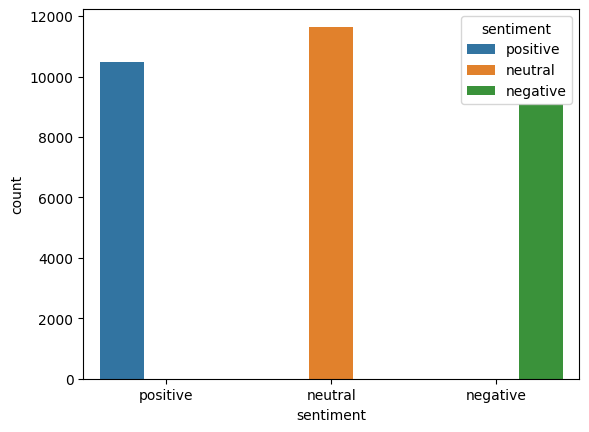

In [ ]:
counts = train_df.label.value_counts().to_dict()
print(counts)
sns.countplot(data=train_df, x='sentiment', hue="sentiment")

In [ ]:
val_df = pd. DataFrame(val_ds)
val_df.head()

,id,text,label,sentiment
0,317,Laying in bed til workkk... Oh the life. Defin...,0,negative
1,24292,ooohhh imma need you to get on that asap love...,2,positive
2,3513,"Thanks! I love it they have a video, so you d...",2,positive
3,4322,I left my ipod in the car so now its all warm.,2,positive
4,6203,Great app. Only complaint is that I'd like the...,2,positive


{1: 11649, 2: 10478, 0: 9105}


<Axes: xlabel='sentiment', ylabel='count'>

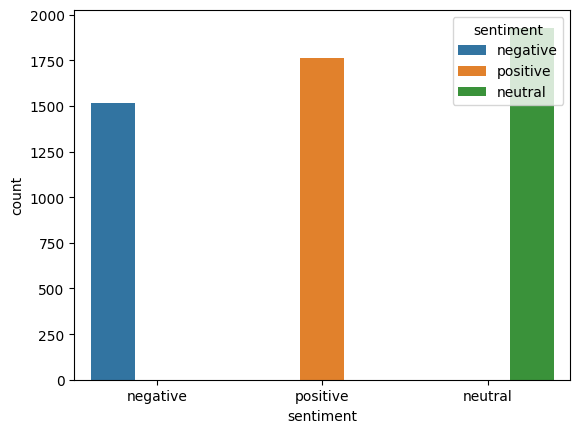

In [ ]:
print(counts)
sns.countplot(data=val_df, x='sentiment', hue="sentiment")

In [ ]:
test_df = pd. DataFrame(test_ds)
test_df.head()

,id,text,label,sentiment
0,9235,getting cds ready for tour,1,neutral
1,16790,"MC, happy mother`s day to your mom ;).. love yah",2,positive
2,24840,A year from now is graduation....i am pretty s...,0,negative
3,20744,because you had chips and sale w/o me,1,neutral
4,6414,Great for organising my work life balance,2,positive


{1: 11649, 2: 10478, 0: 9105}


<Axes: xlabel='sentiment', ylabel='count'>

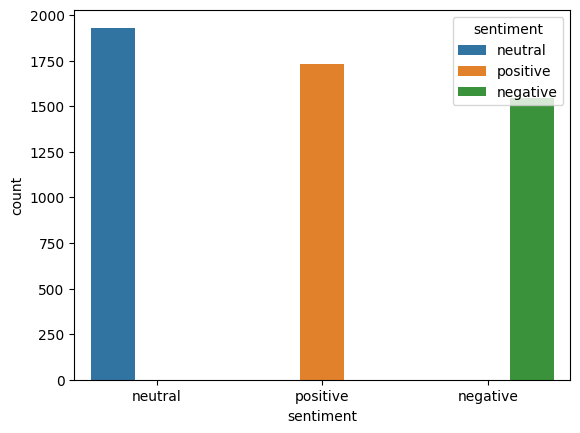

In [ ]:
print(counts)
sns.countplot(data=test_df, x='sentiment', hue="sentiment")

### Data Pre-Processing

In [ ]:
print(train_df.isnull().sum())
print(val_df.isnull().sum())
print(test_df.isnull().sum())

id           0
text         0
label        0
sentiment    0
dtype: int64
id           0
text         0
label        0
sentiment    0
dtype: int64
id           0
text         1
label        0
sentiment    0
dtype: int64


In [ ]:
# train_df = train_df.dropna()
# val_df = val_df.dropna()
test_df = test_df.dropna()

In [ ]:
print(train_df[train_df['text']==''])
print(val_df[val_df['text']==''])
print(test_df[test_df['text']==''])

Empty DataFrame
Columns: [id, text, label, sentiment]
Index: []
Empty DataFrame
Columns: [id, text, label, sentiment]
Index: []
Empty DataFrame
Columns: [id, text, label, sentiment]
Index: []


In [ ]:
# print(train_df.isnull().sum())
# print(val_df.isnull().sum())
print(test_df.isnull().sum())

id           0
text         0
label        0
sentiment    0
dtype: int64


<Axes: ylabel='Density'>

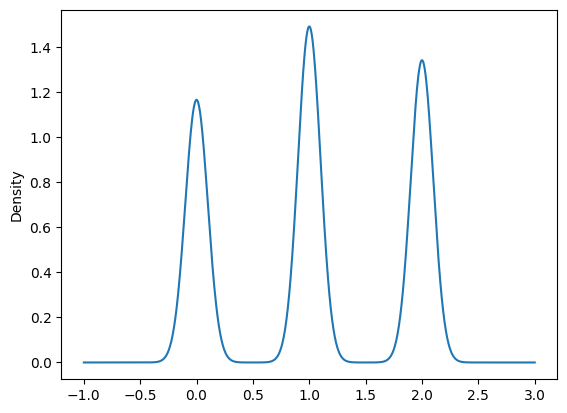

In [ ]:
train_df.label.plot.kde()

<Axes: ylabel='Density'>

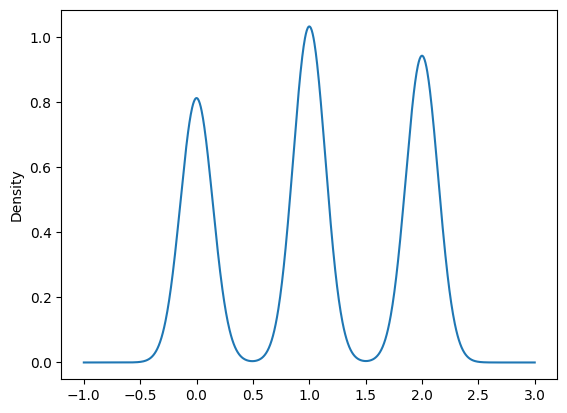

In [ ]:
val_df.label.plot.kde()

<Axes: ylabel='Density'>

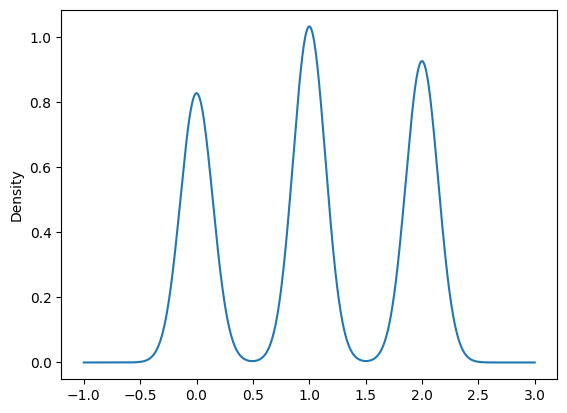

In [ ]:
test_df.label.plot.kde()

In [ ]:
import re
def process_text(text):
    text = str(text)
    TAG_RE = re.compile(r'<[^>]+>')
    # Removing html tags
    text = TAG_RE.sub('', text)

    # Remove punctuations and numbers
    text = re.sub('[^a-zA-Z]', ' ', text)

    # Single character removal
    sentence = re.sub(r"s+[a-zA-Z]s+", ' ', text)
    text = re.sub(r'[^\w\s\']', '', text)
    text = re.sub(' +', ' ', text).lower()
    # Removing multiple spaces
    sentence = ' '.join([word for word in sentence.split() if len(word) > 1])
    return text

In [ ]:
test_df.text = test_df.text.apply(process_text)

In [ ]:
PRE_TRAINED_MODEL_NAME = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)

### Model

In [ ]:
#@title Model1
bert_model = BertModel.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
class SentimentClassifier(nn.Module):

  def __init__(self, n_classes):
    super(SentimentClassifier, self).__init__()
    self.bert = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME)
    self.drop = nn.Dropout(p=0.3)
    self.out = nn.Linear(self.bert.config.hidden_size, n_classes)

  def forward(self, input_ids, attention_mask):
    model = self.bert(
      input_ids=input_ids,
      attention_mask=attention_mask
    )
    pooled_output = model.pooler_output
    output = self.drop(pooled_output)
    return self.out(output)

In [ ]:
class_names = ['negative', 'neutral', 'positive']
model = SentimentClassifier(len(class_names))

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
model.load_state_dict(torch.load('model_state_cpu.bin'))

<All keys matched successfully>

In [ ]:
def get_predictions(data):
  preds=[]
  for item in data.text:
    encoding_text = tokenizer.encode_plus(
      item,
      add_special_tokens=True,
      max_length=160,
      return_token_type_ids=False,
      pad_to_max_length=True,
      return_attention_mask=True,
      return_tensors='pt',
    )
    outputs = model(encoding_text['input_ids'], encoding_text['attention_mask'])
    _, pred = torch.max(outputs, dim=1)
    pred = pred.item()
    preds.append(pred)
  return preds

In [ ]:
y_preds = get_predictions(test_df)
print(y_preds)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2377: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


[1, 2, 0, 1, 2, 2, 0, 1, 1, 1, 2, 1, 2, 0, 1, 1, 1, 2, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 1, 0, 1, 1, 1, 2, 2, 0, 2, 2, 2, 1, 0, 0, 2, 0, 1, 2, 0, 0, 1, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 1, 0, 1, 1, 1, 0, 1, 2, 1, 1, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 1, 0, 0, 1, 2, 1, 2, 2, 0, 1, 0, 2, 2, 2, 1, 0, 0, 1, 1, 0, 1, 2, 1, 2, 1, 2, 2, 2, 2, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 2, 2, 1, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 0, 2, 2, 0, 2, 1, 2, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 2, 0, 2, 2, 0, 1, 0, 1, 1, 1, 2, 2, 1, 0, 2, 2, 2, 0, 1, 0, 1, 1, 2, 1, 1, 2, 0, 1, 1, 1, 2, 2, 1, 0, 2, 0, 2, 1, 0, 0, 2, 1, 2, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 0, 1, 1, 0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 1, 0, 2, 1, 0, 2, 2, 2, 0, 2, 0, 0, 2, 1, 0, 1, 0, 2, 1, 1, 0, 1, 1, 2, 0, 1, 1, 1, 2, 2, 0, 0, 2, 2, 1, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2, 1, 1, 1, 0, 2, 1, 1, 2, 1, 0, 2, 2, 2, 2, 1, 0, 1, 1, 1, 0, 2, 0, 1, 2, 0, 2, 

In [ ]:
y_true = test_df.label

In [ ]:
print(classification_report(y_true, y_preds, target_names=["negative", "neutral", "positive"]))

              precision    recall  f1-score   support

    negative       0.76      0.77      0.77      1546
     neutral       0.69      0.67      0.68      1929
    positive       0.81      0.82      0.81      1730

    accuracy                           0.75      5205
   macro avg       0.75      0.75      0.75      5205
weighted avg       0.75      0.75      0.75      5205



In [57]:
cm = confusion_matrix(y_true, y_preds)

In [58]:
def show_confusion_matrix(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('True sentiment')
  plt.xlabel('Predicted sentiment')

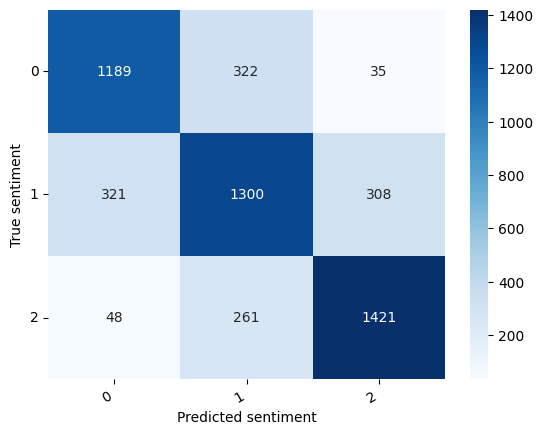

In [59]:
df_cm = pd.DataFrame(cm)
show_confusion_matrix(df_cm)

In [60]:
df_eval = pd.DataFrame({
    "true": y_true,
    "pred": y_preds
}, columns=["true", "pred"])

<Axes: xlabel='true', ylabel='count'>

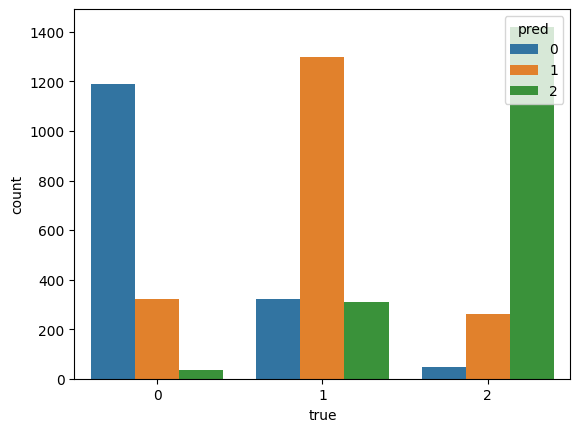

In [61]:
sns.countplot(data=df_eval, x="true", hue="pred")

In [ ]:
#@title Model2
task='sentiment'
MODEL_PATH = f"cardiffnlp/twitter-roberta-base-{task}"
tokenizer = AutoTokenizer.from_pretrained(MODEL_PATH)

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained(MODEL_PATH)
model.save_pretrained(MODEL_PATH)

In [ ]:
def get_predictions2(reviews):
  preds = []
  class_names=["negative", "neutral", "positive"]
  for review in reviews:
    encoded_input = tokenizer(review, return_tensors='pt')
    output = model(**encoded_input)
    scores = output[0][0].detach().numpy()

    scores = softmax(scores)
    # pred = class_names[np.argmax(scores)]
    pred = np.argmax(scores)
    preds.append(pred)
  return preds


In [ ]:
y_preds2 = get_predictions2(test_df.text)

In [ ]:
print(classification_report(y_true, y_preds2, target_names=["negative", "neutral", "positive"]))

              precision    recall  f1-score   support

    negative       0.71      0.77      0.74      1546
     neutral       0.69      0.56      0.62      1929
    positive       0.73      0.84      0.78      1730

    accuracy                           0.71      5205
   macro avg       0.71      0.72      0.71      5205
weighted avg       0.71      0.71      0.71      5205



In [62]:
cm = confusion_matrix(y_true, y_preds2)

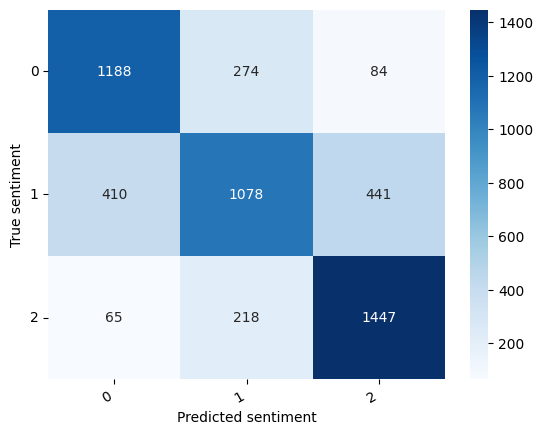

In [63]:
df_cm = pd.DataFrame(cm)
show_confusion_matrix(df_cm)

In [64]:
df_eval = pd.DataFrame({
    "true": y_true,
    "pred": y_preds2
}, columns=["true", "pred"])

<Axes: xlabel='true', ylabel='count'>

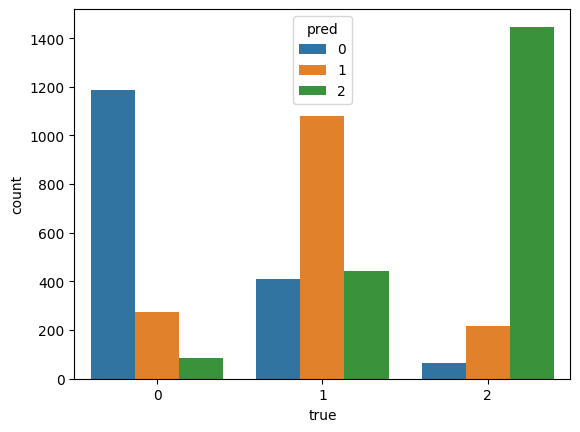

In [65]:
sns.countplot(data=df_eval, x="true", hue="pred")

In [ ]:
#@title Model3
model3 = BertForSequenceClassification.from_pretrained("ahmedrachid/FinancialBERT-Sentiment-Analysis", num_labels=3)
tokenizer3 = BertTokenizer.from_pretrained("ahmedrachid/FinancialBERT-Sentiment-Analysis")

In [ ]:
nlp = pipeline("sentiment-analysis", model=model3, tokenizer=tokenizer3)

Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [ ]:
results = nlp(test_df['text'].to_list())

In [ ]:
y_preds3 = [result['label']  for result in results]

In [66]:
print(classification_report(test_df['sentiment'], y_preds3, target_names=class_names))

              precision    recall  f1-score   support

    negative       0.75      0.08      0.14      1546
     neutral       0.39      0.97      0.55      1929
    positive       0.77      0.10      0.18      1730

    accuracy                           0.41      5205
   macro avg       0.64      0.38      0.29      5205
weighted avg       0.62      0.41      0.30      5205



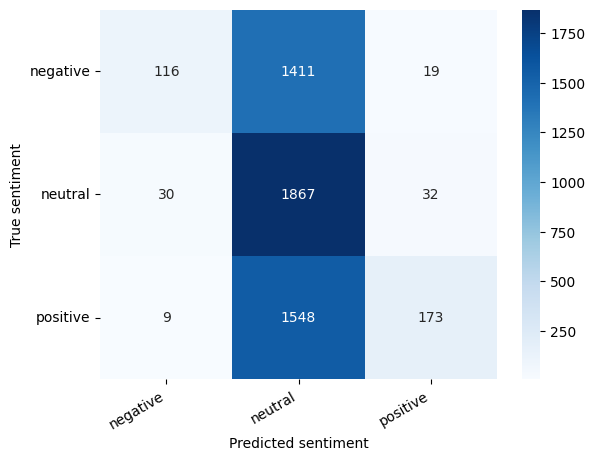

In [67]:
cm = confusion_matrix(test_df['sentiment'], y_preds3)
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
show_confusion_matrix(df_cm)

In [68]:
df_eval = pd.DataFrame({
    "true": test_df['sentiment'],
    "pred": y_preds3
}, columns=["true", "pred"])

<Axes: xlabel='true', ylabel='count'>

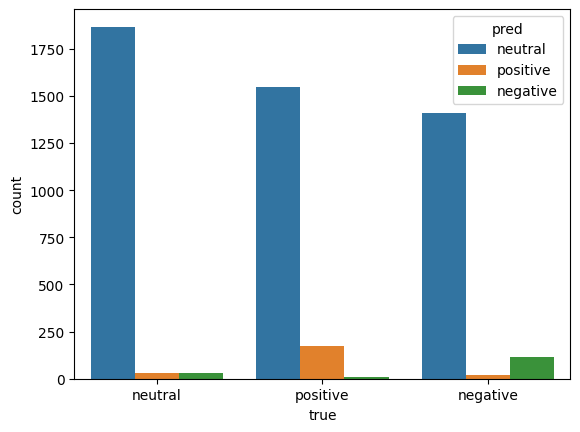

In [69]:
sns.countplot(data=df_eval, x="true", hue="pred")